# PROYECTO FINAL

## Problema 1

In [ ]:
import pandas as pd
import spacy
import spacy.cli
import re

Descargamos de Spacy, el procesado de lenguaje natural medio en ingles

In [ ]:
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


Cargamos el procesado a nuestra varialbe para ser utilizado más adelante

In [ ]:
nlp = spacy.load("en_core_web_md")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/Proyecto Final Text Mining/tw_source.csv'

In [ ]:
conjunto= pd.read_csv(ruta, encoding='latin-1')

In [ ]:
conjunto

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
conjunto.shape

(1599999, 6)

### Parte 1
Identificar los 3 usuarios más populares dentro del data set, para esto se extaerá los usuarios de cada tweet y se sumarán las veces que más se mencionan dentro del dataset

El dataset no trae el nombre de los campos, por lo que agegará en la siguiente línea de código

In [ ]:
nombre_columnas = ['Seccion','ID','TimeStamp','Query','Usuario','Tweet']
conjunto.columns = nombre_columnas

El resultado es el siguiente

In [ ]:
conjunto

,Seccion,ID,TimeStamp,Query,Usuario,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Se extrae los tweets por aparte

In [ ]:
tweets = conjunto['Tweet']

Se crea un regex, para extaer todos los usuarios y almacenarlos en una variable vacía, através de un bucle for, cada vez que se encuentra un usuario lo contabilizará, y se alamcenará en un nuevo dataframe ordenandolo de mayor a menor para que así extraer los tres usuarios más populares

In [ ]:
usuarios_twitter = {}

# Expresión regular para encontrar usuarios de Twitter
# Esta expresión regular coincide con cualquier cadena que comience con "@" seguido de letras, números y guiones bajos
patron_usuario_twitter = r"@\w+"

# Iterar a través de cada fila del DataFrame y contar usuarios de Twitter
for index, row in conjunto.iterrows():
    tweet = row['Tweet']
    usuarios_en_tweet = re.findall(patron_usuario_twitter, tweet)
    for usuario in usuarios_en_tweet:
        if usuario in usuarios_twitter:
            usuarios_twitter[usuario] += 1
        else:
            usuarios_twitter[usuario] = 1

# Crear un DataFrame a partir del diccionario de usuarios_twitter
df_usuarios = pd.DataFrame(list(usuarios_twitter.items()), columns=['Usuario', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia de mayor a menor
df_usuarios = df_usuarios.sort_values(by='Frecuencia', ascending=False)

# Obtener los 10 primeros usuarios con mayor frecuencia
top_3_usuarios = df_usuarios.head(3)

# Imprimir el resultado
print("Los tres usuarios más populares de los tweets son: ")
print(top_3_usuarios)

Los tres usuarios más populares de los tweets son: 
         Usuario  Frecuencia
384  @mileycyrus        4500
611    @tommcfly        3887
183    @ddlovato        3467


### Parte 2
Creación de corpus para los tres usuarios identificados

No es necesario un balanceo de datos ya que no existe distancias cignificatias entre la cantidad de veces que se menciona un usuario de otro.  Se creará el campo Length del dataset

In [ ]:
conjunto['Length'] = conjunto['Tweet'].apply(len)

Extracción de los tweets de los usuarios top

In [ ]:
mileycyrus = conjunto[conjunto['Usuario']=='MileyCyrus']
tommcfly = conjunto[conjunto['Usuario']=='tommcfly']
ddlovato = conjunto[conjunto['Usuario']=='ddlovato']


In [ ]:
dataset = pd.concat([mileycyrus, tommcfly, ddlovato])
dataset.head

In [ ]:
datasetMC = pd.concat([mileycyrus])
datasetTomm = pd.concat([tommcfly])
datasetLovato = pd.concat([ddlovato])

In [ ]:
mileycyrus.shape, tommcfly.shape, ddlovato.shape

((20, 7), (8, 7), (11, 7))

No hay necesidad de balancear los datos ya que no existe una cantidad de tweets grande de un usuario a otro segúne el shape anterior, por lo que se crean ya sus corpus

### Creación de los Corpus

Corpus general

In [ ]:
corpus = dataset['Tweet']
corpus

Corpus de Individuales

In [ ]:
corpusMC = datasetMC['Tweet']
corpusTomm = datasetTomm['Tweet']
corpusLovatto = datasetLovato['Tweet']

### 1 Normalización de Texto

In [ ]:
def normalizacion(corpus):
    newCorpus = []
    for doc in corpus:
       newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]','',doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus


Normalización por usuario

In [ ]:
def normalizacionMC(corpusMC):
    newCorpus = []
    for doc in corpusMC:
       newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]','',doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

In [ ]:
def normalizacionTomm(corpusTomm):
    newCorpus = []
    for doc in corpusTomm:
       newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]','',doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

In [ ]:
def normalizacionLovatto(corpusLovatto):
    newCorpus = []
    for doc in corpusLovatto:
       newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]','',doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

In [ ]:
corpus_normalizationMC = normalizacionMC(corpusMC)
corpus_normalizationTomm = normalizacionTomm(corpusTomm)
corpus_normalizationLovatto = normalizacionLovatto(corpusLovatto)
corpus_normalizationLovatto

['mileycyrus i miss you  come over and say bye before i leave',
 'still watching nights in rodanthe its at the end and its so sad',
 'watching notorious for the third time i wish biggie was still around',
 'my voice is shot  please pray for its strength for tomorrows show',
 'tracecyrus please come home',
 'okay ready i think this has been long enough',
 'selenagomez aww i love you  you album is gonna be so killer dude were doing this like our dreams are coming true',
 'cant sleep must be the time change right lt3',
 'thanks to you now i get you should know that i get what i want since u been gone',
 'jacvanek hahahaha sooorrry when i get back we will i promise',
 'spending the night at therealtiffany s yayyyy  i looooove her']

### 2. Tokenizacion

Aplicamos el lenguaje NLP para aplicar la tokenizacion

In [ ]:
def tokenizacion(corpus):
  newCorpus = []
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus


Tokenización por usuario

In [ ]:
def tokenizacionMC(corpusMC):
  newCorpus = []
  for doc in corpusMC:
    newCorpus.append(nlp(doc))
  return newCorpus

In [ ]:
def tokenizacionTomm(corpusTomm):
  newCorpus = []
  for doc in corpusTomm:
    newCorpus.append(nlp(doc))
  return newCorpus

In [ ]:
def tokenizacionLovatto(corpusLovatto):
  newCorpus = []
  for doc in corpusLovatto:
    newCorpus.append(nlp(doc))
  return newCorpus

In [ ]:
corpus_tokenizacionMC = tokenizacionMC(corpus_normalizationMC)
corpus_tokenizacionTomm = tokenizacionTomm(corpus_normalizationTomm)
corpus_tokenizacionLovatto = tokenizacionLovatto(corpus_normalizationLovatto)
corpus_tokenizacionMC

[in makeup and hair  why does mother nature hate me my tummy hurts im falling asleep and its rainy im exhausted,
 i have tracecyrus disorder i can not sleep i stay up all night and wanna snooze all day  grrr,
 httptwitpiccom67hac  my besties if only ddlovato was there,
 tracecyrus plz dont fall in love with tokyo and never come home,
 at hannah montana set im missing tennessee alot today,
 feeling a little,
 plllleeeasseee vote for me for the mtv movie awards omgosh i am a nervous wreck  ahhh i need mandyyjirouxx time,
 poor noie just fell on her skateboard and scraped up her elbow  im the worst sister ever i was like quotitll make a cool scarquot haha,
 heidimontag wish you werent in the stinkin jungle so i could see you tonight,
 i feel like i might throw up,
 crazy day just left the wrap party for hannah montana season 3  sad for the ending and stoked for a new beginning 4th season here i come,
 tracecyrus i miss bowie he was the cutest,
 im craving sushi and jamba juice  i miss la,

### 3. Remover Stopwords

In [ ]:
def removeStops(corpus):
    newCorpus = []
    for doc in corpus:
         s = ''
         for token in doc:
              if(token.is_stop ==False):
                   s=s+token.text +''
         newCorpus.append(s.strip())
    return newCorpus


Remover StopWords por usuario

In [ ]:
def removeStopsMC(corpusMC):
    newCorpus = []
    for doc in corpusMC:
         s = ''
         for token in doc:
              if(token.is_stop ==False):
                   s=s+token.text +' '
         newCorpus.append(s.strip())
    return newCorpus

In [ ]:
def removeStopsTomm(corpusTomm):
    newCorpus = []
    for doc in corpusTomm:
         s = ''
         for token in doc:
              if(token.is_stop ==False):
                   s=s+token.text +' '
         newCorpus.append(s.strip())
    return newCorpus

In [ ]:
def removeStopsLovatto(corpusLovatto):
    newCorpus = []
    for doc in corpusLovatto:
         s = ''
         for token in doc:
              if(token.is_stop ==False):
                   s=s + token.text + ' '
         newCorpus.append(s.strip())
    return newCorpus

In [ ]:
corpus_no_stops_MC = removeStopsMC(corpus_tokenizacionMC)
corpus_no_stops_Tomm = removeStopsTomm(corpus_tokenizacionTomm)
corpus_no_stops_Lovatto = removeStopsLovatto(corpus_tokenizacionLovatto)
corpus_no_stops_MC[1]

'tracecyrus disorder sleep stay night wanna snooze day   grrr'

### 4. Realizar Stemming y lemmatización

In [ ]:
def stemmingLemmating(corpus):
    documents = tokenizacion(corpus)
    newDocs = []
    for doc in documents:
        s = ''
        for token in doc:
          s = s+token.lemma_+' '
        newDocs.append(s.strip())
    return newDocs


Stemming y lematizacion de cada usuario

In [ ]:
def stemmingLemmatingMC(corpusMC):
    documents = tokenizacionMC(corpusMC)
    newDocs = []
    for doc in documents:
        s = ''
        for token in doc:
          s = s+token.lemma_+' '
        newDocs.append(s.strip())
    return newDocs

In [ ]:
def stemmingLemmatingTomm(corpusTomm):
    documents = tokenizacionTomm(corpusTomm)
    newDocs = []
    for doc in documents:
        s = ''
        for token in doc:
          s = s+token.lemma_+' '
        newDocs.append(s.strip())
    return newDocs

In [ ]:
def stemmingLemmatingLovatto(corpusLovatto):
    documents = tokenizacionLovatto(corpusLovatto)
    newDocs = []
    for doc in documents:
        s = ''
        for token in doc:
          s = s+token.lemma_+' '
        newDocs.append(s.strip())
    return newDocs

In [ ]:
corpus_stemm_lemm_MC = stemmingLemmatingMC(corpus_no_stops_MC)
corpus_stemm_lemm_Tomm = stemmingLemmatingTomm(corpus_no_stops_Tomm)
corpus_stemm_lemm_Lovatto = stemmingLemmatingLovatto(corpus_no_stops_Lovatto)
corpus_stemm_lemm_MC

['makeup hair    mother nature hate tummy hurts m fall asleep rainy m exhaust',
 'tracecyrus disorder sleep stay night wanna snooze day    grrr',
 'httptwitpiccom67hac    besties ddlovato',
 'tracecyrus plz not fall love tokyo come home',
 'hannah montana set m miss tennessee alot today',
 'feel little',
 'plllleeeasseee vote mtv movie award omgosh nervous wreck    ahhh need mandyyjirouxx time',
 'poor noie fall skateboard scrape elbow    m bad sister like quotitll cool scarquot haha',
 'heidimontag wish not stinkin jungle tonight',
 'feel like throw',
 'crazy day leave wrap party hannah montana season 3    sad ending stoke new begin 4th season come',
 'tracecyrus miss bowie cutest',
 'm crave sushi jamba juice    miss la',
 'hunterpitkin nt church church love happy birthday',
 'mtv awards day ahh omgosh vote time',
 'get ready mtv award ahh m nervous nervous nervous',
 'tracecyrus totally hug lil wayne jealous bro',
 'sofie super cranky    know puppy like mommy',
 'end have wonderful 

### 5. Mostrar un wordcloud con el top 10 para cada usuario

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### WordCloud de Miley Cyrus

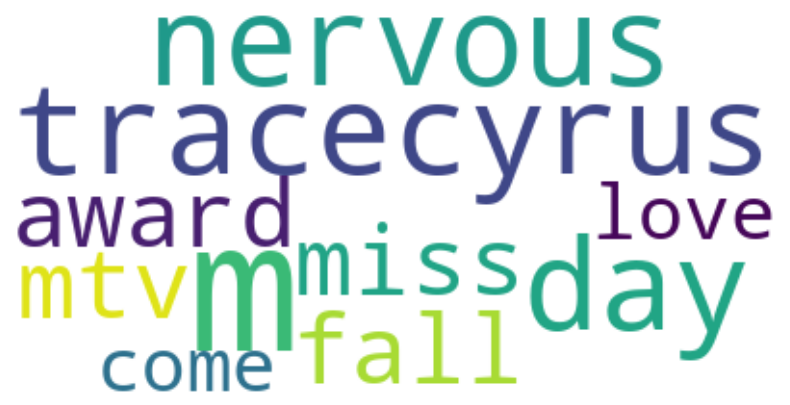

In [ ]:
# Concatena todo el texto en una sola cadena
text = ' '.join(corpus_stemm_lemm_MC)

# Crea el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=10).generate(text)

# Muestra la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud de Tomm

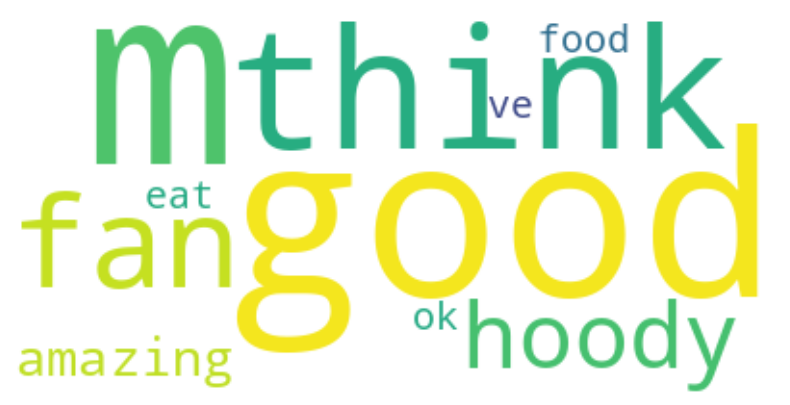

In [ ]:
# Concatena todo el texto en una sola cadena
text = ' '.join(corpus_stemm_lemm_Tomm)

# Crea el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=10).generate(text)

# Muestra la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud de Lovatto

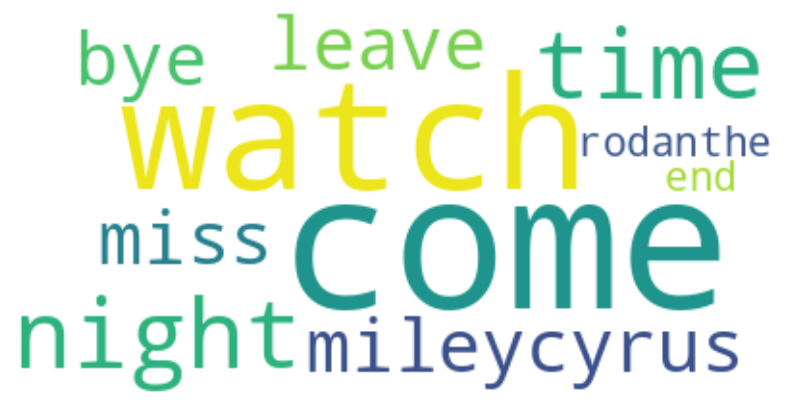

In [ ]:
# Concatena todo el texto en una sola cadena
text = ' '.join(corpus_stemm_lemm_Lovatto)

# Crea el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=10).generate(text)

# Muestra la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Con base a las palabras claves que se identificaron en los tres usuarios, indican respecto al escandalo que tuvo Miley Cirus en la noche de Mtv, cuando hizo un baile bastante polémico, máximo cuando se repite la palabra clave Tracecyrus y que uno de los que le gustó bastante fue un fann llamado Tomm y donde le sorpendió a Demmi Lovatto